# Illustrates the use of the WR (Weather Regime) class for a single proxy

In [33]:
%matplotlib inline

In [34]:
import os 
import sys
import pathlib

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import the development version of paleopy

In [36]:
from paleopy import proxy
from paleopy import analogs
from paleopy import WR

### determine the current working directory 

In [37]:
cwd = pathlib.Path.cwd() 

In [38]:
print(cwd)

/home/nicolasf/research/PICT_notebooks/notebooks


#### defines the folder where the JSON files are (for the datasets) and where to save the proxy JSON files

In [39]:
djsons = cwd.parent.joinpath('jsons')

In [40]:
pjsons = djsons.joinpath('proxies')

### instantiates a proxy with the required parameters

In [41]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          calc_anoms = True, \
          detrend = True)

### find the analogs

In [42]:
p.find_analogs()

### print the updated proxy features

In [43]:
p.proxy_repr(pprint=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'slope': 0.03254089836312946, 'intercept': -64.96142370346887}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
weights:[0.15378256674309246, 0.1556824020345763, 0.09780756229126657, 0.1241568749877504, 0.16163831234560427, 0.14973348587014138, 0.1571987957275686]
}


### Now instantiates a `WR` (Weather Regime) class, passing the newly created ensemble object, and the classification of interest 

In [44]:
w = WR(p, classification='New Zealand (Kidson 2000)')

### plots the bar plot, significance level = 99%, the anomalies in frequency significant at the corresponding level are marked with the black border and the more intense color 

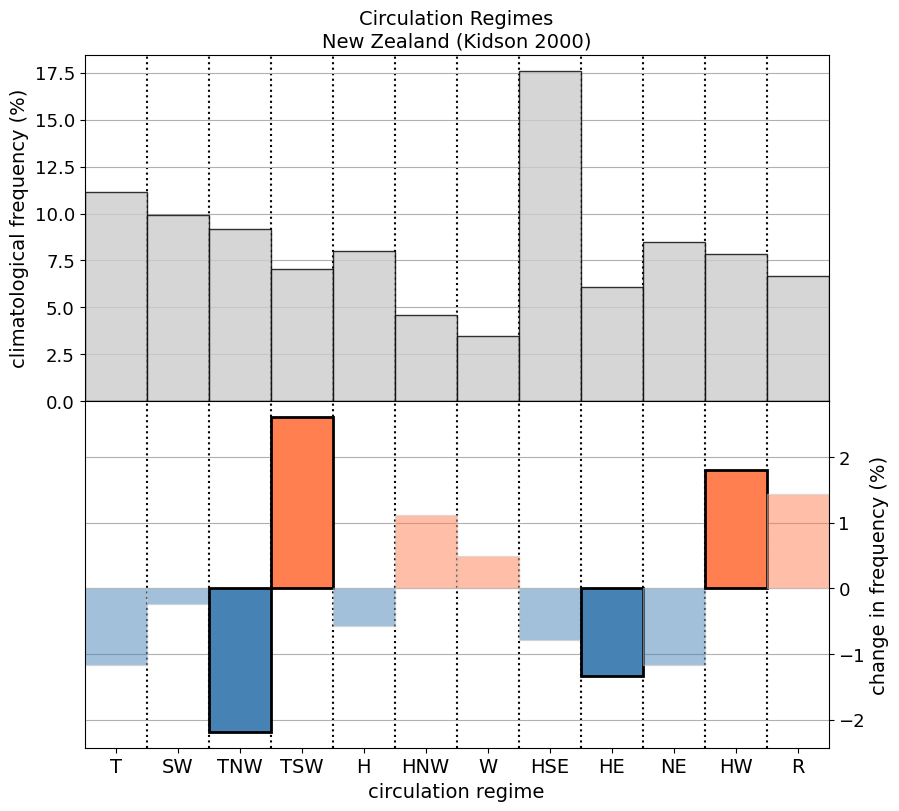

In [45]:
f, axs = w.plot_bar(sig=1)

### same example as above but for the SW Pacific regime decomposition 

In [46]:
w = WR(p, classification='SW Pacific (Lorrey and Fauchereau 2018)')

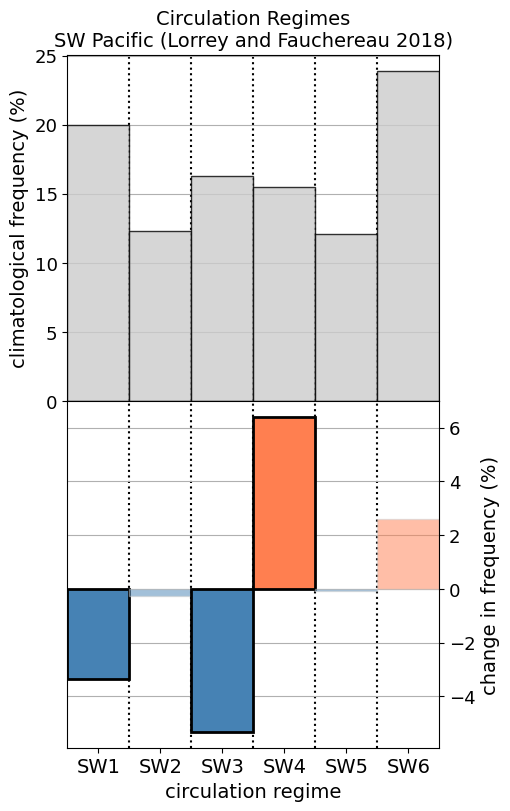

In [47]:
f = w.plot_bar(sig=1)

In [48]:
w = WR(p, classification='New Zealand (Rampal et al. 2022)')

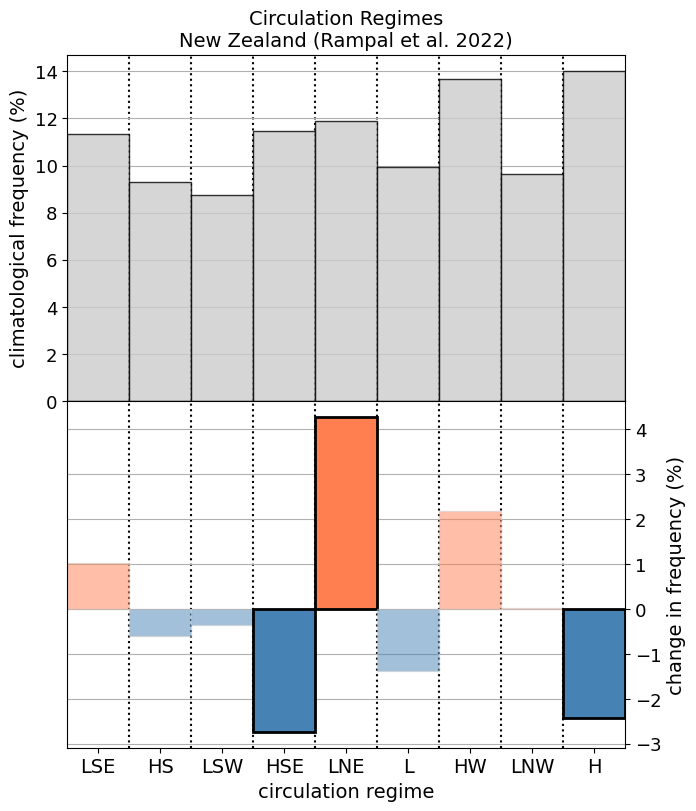

In [49]:
f = w.plot_bar(sig=1)

In [50]:
w.df_probs

,Rarotonga,10,90,5,95,1,99
LSE,0.123613,0.103936,0.125716,0.100879,0.128773,0.096672,0.133363
HS,0.087163,0.084448,0.110050,0.081754,0.115017,0.075273,0.122667
LSW,0.083994,0.075659,0.098968,0.072984,0.102025,0.068013,0.108525
HSE,0.087163,0.102025,0.123424,0.098968,0.126099,0.092465,0.131070
LNE,0.161648,0.102407,0.131448,0.098204,0.136034,0.091322,0.142147
L,0.085578,0.087505,0.115781,0.084429,0.119603,0.077570,0.128013
HW,0.158479,0.122621,0.147879,0.118074,0.152083,0.110428,0.160115
LNW,0.096672,0.082537,0.105846,0.079079,0.109285,0.073366,0.116546
H,0.115689,0.127245,0.156668,0.123787,0.160871,0.115778,0.168135


In [51]:
w.df_anoms * 100

,Rarotonga
LSE,1.020363
HS,-0.592875
LSW,-0.355713
HSE,-2.735468
LNE,4.269731
L,-1.379355
HW,2.179593
LNW,0.025525
H,-2.431801


In [52]:
w = WR(p, classification='Ross Sea (Cohen et al. 2013)')

In [55]:
f = w.plot_bar(sig=1)

KeyError: "Unable to synchronously open object (object 'DJF' doesn't exist)"

In [20]:
# f = w.plot_bar(sig=1)